## Import stuff

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


## Read data

In [4]:
PATH = "C:\\DMC_2018\\raw_data\\"

items = pd.read_csv(PATH + "items.csv", sep='|')
prices = pd.read_csv(PATH + "prices.csv", sep='|')
train = pd.read_csv(PATH + "train.csv", sep='|')


## Explore Items set

In [9]:
items.head(15)

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
0,10000,XL ( 158-170 ),gruen,Nike,25.33,1,7,25.0,1,2017-10-01
1,10001,L,schwarz,Jako,38.03,1,7,16.0,1,2017-10-01
2,10003,3 (35-38 ),weiss,Jako,12.63,1,7,13.0,1,2017-10-01
3,10003,4 ( 39-42 ),weiss,Jako,12.63,1,7,13.0,1,2017-10-01
4,10003,5 ( 43-46 ),weiss,Jako,12.63,1,7,13.0,1,2017-10-01
5,10006,XL,blau,Under Armour,57.08,15,24,NaN,1,2017-10-01
6,10008,XL,blau,PUMA,25.33,1,7,8.0,12,2017-10-01
7,10013,L,schwarz,adidas,69.78,1,7,16.0,1,2017-10-27
8,10013,M,schwarz,adidas,69.78,1,7,16.0,1,2017-10-27
9,10013,S,schwarz,adidas,69.78,1,7,16.0,1,2017-10-27


In [10]:
items.isnull().sum()

pid                0
size               9
color              0
brand              0
rrp                0
mainCategory       0
category           0
subCategory     1134
stock              0
releaseDate        0
dtype: int64

In [51]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Data columns (total 10 columns):
pid             12824 non-null int64
size            12815 non-null object
color           12824 non-null object
brand           12824 non-null object
rrp             12824 non-null float64
mainCategory    12824 non-null int64
category        12824 non-null int64
subCategory     11690 non-null float64
stock           12824 non-null int64
releaseDate     12824 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 1002.0+ KB


In [52]:
items.describe()

,pid,rrp,mainCategory,category,subCategory,stock
count,12824.000000,12824.000000,12824.000000,12824.000000,11690.000000,12824.000000
mean,16407.743528,98.526149,3.538677,10.185823,15.971771,3.532829
std,3700.225391,90.787734,4.614558,10.035180,11.329647,11.034285
min,10000.000000,2.470000,1.000000,2.000000,3.000000,1.000000
25%,13185.000000,38.030000,1.000000,2.000000,5.000000,1.000000
50%,16348.500000,69.780000,1.000000,7.000000,14.000000,1.000000
75%,19635.000000,114.230000,9.000000,10.000000,23.000000,2.000000
max,22881.000000,463.480000,15.000000,37.000000,44.000000,459.000000


Pandas nie umie trzymać NaNów w kolumnie integer i dlatego wczytał subCategory jako floata. Zastąpię Nany w tej kolumnie wartością 0 i zamienię ją na int64. 

In [53]:
items['subCategory'].fillna(0, inplace=True)
items['subCategory'].astype('int64', inplace=True)

0        25
1        16
2        13
3        13
4        13
5         0
6         8
7        16
8        16
9        16
10        8
11        8
12        0
13       14
14       31
15       35
16       32
17       32
18       32
19       22
20       22
21       22
22       32
23        6
24        8
25        8
26       21
27       21
28       21
29        3
         ..
12794    21
12795    32
12796    32
12797    40
12798    32
12799    32
12800    32
12801    32
12802    32
12803    32
12804     3
12805     3
12806     3
12807     3
12808     3
12809     3
12810     3
12811     3
12812     3
12813     3
12814     3
12815     3
12816     3
12817    22
12818    14
12819    14
12820    14
12821    14
12822    14
12823    31
Name: subCategory, Length: 12824, dtype: int64

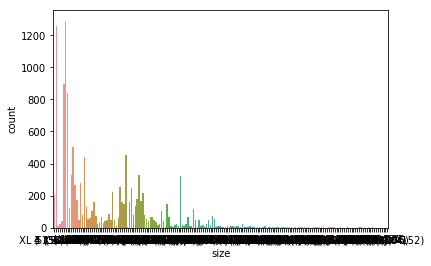

In [54]:
s=sns.countplot(x='size', data=items)


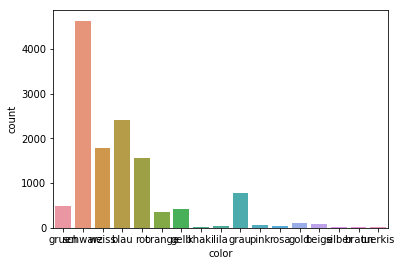

In [55]:
sns.countplot(x='color', data=items)

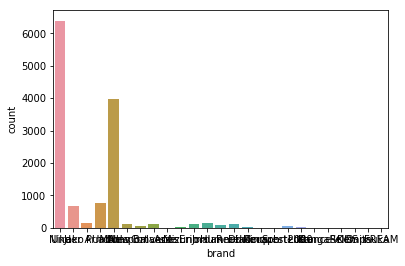

In [56]:
sns.countplot(x='brand', data=items)

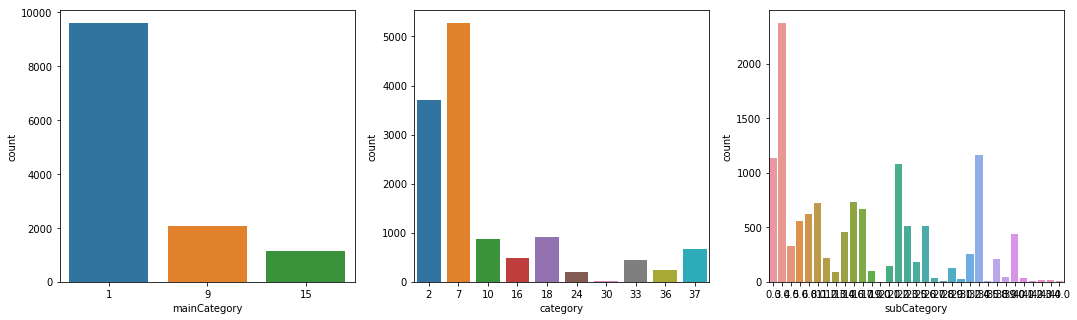

In [57]:

fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(x='mainCategory', data=items, ax=ax[0])
sns.countplot(x='category', data=items, ax=ax[1])
sns.countplot(x='subCategory', data=items, ax=ax[2])
plt.show()

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


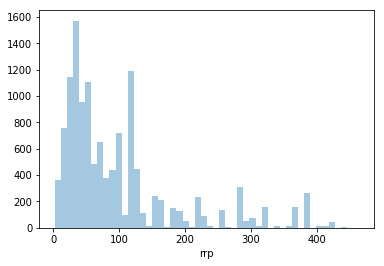

In [58]:
sns.distplot(a=items.loc[:, 'rrp'], kde=False)


## Explore prices set


In [16]:
prices.shape

(12824, 153)

In [17]:
prices.head(15)

,pid,size,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
0,19671,39 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
1,19671,40,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
2,19671,41 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
3,19671,42,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
4,19671,42 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
5,19671,43 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
6,19671,44,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
7,19671,44 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
8,19671,45 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
9,19671,46 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31


In [ ]:
prices.isnull().sum()

pid              0
size             9
2017-10-01    1932
2017-10-02    1932
2017-10-03    1932
2017-10-04    1932
2017-10-05    1928
2017-10-06    1928
2017-10-07    1928
2017-10-08    1928
2017-10-09    1925
2017-10-10    1924
2017-10-11    1924
2017-10-12    1917
2017-10-13    1914
2017-10-14    1914
2017-10-15    1914
2017-10-16    1912
2017-10-17    1906
2017-10-18    1873
2017-10-19    1849
2017-10-20    1839
2017-10-21    1839
2017-10-22    1776
2017-10-23    1702
2017-10-24    1700
2017-10-25    1694
2017-10-26    1641
2017-10-27    1641
2017-10-28    1641
              ... 
2018-01-30       0
2018-01-31       0
2018-02-01       0
2018-02-02       0
2018-02-03       0
2018-02-04       0
2018-02-05       0
2018-02-06       0
2018-02-07       0
2018-02-08       0
2018-02-09       0
2018-02-10       0
2018-02-11       0
2018-02-12       0
2018-02-13       0
2018-02-14       0
2018-02-15       0
2018-02-16       0
2018-02-17       0
2018-02-18       0
2018-02-19       0
2018-02-20  

In [39]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Columns: 153 entries, pid to 2018-02-28
dtypes: float64(151), int64(1), object(1)
memory usage: 15.0+ MB


kolumny od 118 do końca nie mają nulli

Zobaczymy jak rozkładają się ceny w 3 losowych kolumnach bez nulli

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show>

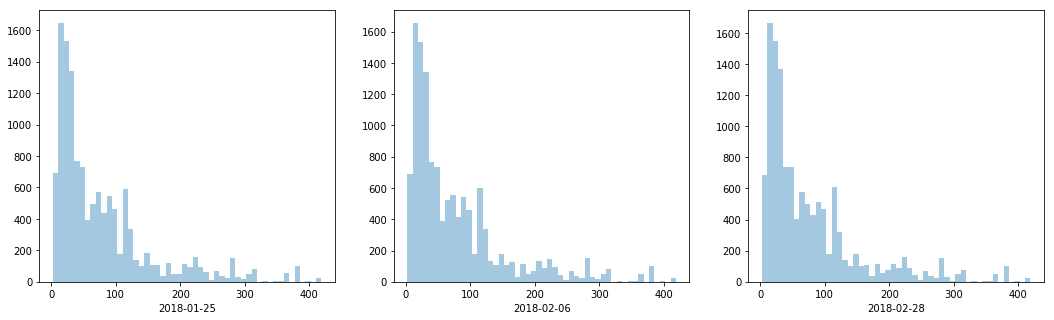

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(a=prices.iloc[:, 118], kde=False, ax = ax[0])
sns.distplot(a=prices.iloc[:, 130], kde=False, ax = ax[1])
sns.distplot(a=prices.iloc[:, 152], kde=False, ax = ax[2])
plt.show

A teraz zobaczymy sobie jak zmieniają się ceny poszczególnych produktów w czasie 

C:\python\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

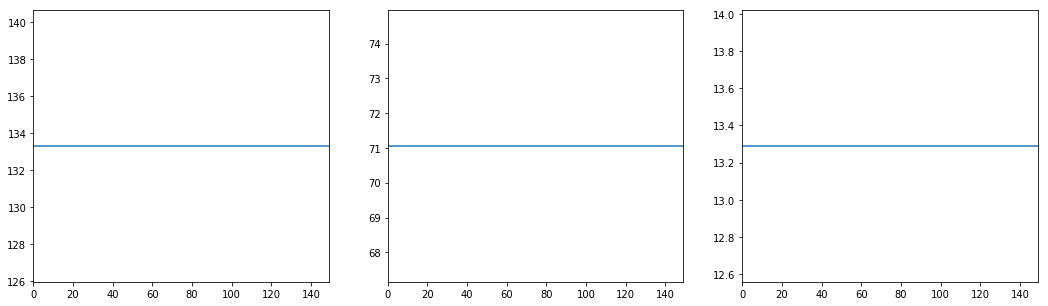

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.tsplot(data=prices.iloc[0, 3:], ax = ax[0])
sns.tsplot(data=prices.iloc[100, 3:], ax = ax[1])
sns.tsplot(data=prices.iloc[200, 3:], ax = ax[2])
plt.show

XD ciekawe, warto by to sprawdzić dla każdej